# 2023년 발생 화재 정리

In [28]:
import pandas as pd
raw_df = pd.read_csv('./data/mainData/fire/화재 현황_2023_전국.csv', encoding = 'utf-8')
raw_df.head()

,WRINV_NO,FIRE_TYPE_NM,BLDG_SRTFRM_NM,BLDG_STRCTR_NM,BLDG_SRTRF_NM,BLDG_RSCU_DNGCT,GRND_NOFL,UDGD_NOFL,BLDG_GFA,BTTM_AREA,...,ARSON_MNG_TRGT_YN,MUB_YN,VHCL_PLC_NM,VHCL_IGTN_PSTN_NM,FND_FIRE_SE_NM,FND_IGTN_PSTN_NM,HR_UNIT_ARTMP,HR_UNIT_WSPD_INFO,WNDRCT_BRNG,HR_UNIT_HUM
0,230922153854771,"건축,구조물",양식(옥),철근콘크리트조,슬라브가,1.0,4.0,1.0,2452.0,650.0,...,Y,N,NaN,NaN,NaN,NaN,3.6,0~4 m/s,북서,30.0
1,230206070140435,"건축,구조물",조립식,비닐하우스 파이프조,비닐하우스,3.0,1.0,0.0,3715.0,487.0,...,N,N,NaN,NaN,NaN,NaN,-3.6,0~4 m/s,북,88.0
2,231227140922465,"건축,구조물",양식(옥),철근콘크리트조,슬라브가,5.0,29.0,1.0,81667.0,9431.0,...,N,N,NaN,NaN,NaN,NaN,28.9,0~4 m/s,북,42.0
3,230829125535750,"건축,구조물",조립식,샌드위치패널조,샌드위치패널,1.0,1.0,0.0,254.0,254.0,...,N,N,NaN,NaN,NaN,NaN,23.0,0~4 m/s,서,0.0
4,230131111556815,"건축,구조물",양식(옥),벽돌조,슬라브가,1.0,2.0,1.0,171.0,171.0,...,N,N,NaN,NaN,NaN,NaN,-7.8,0~4 m/s,남동,46.0


In [29]:
df_seoul = raw_df[raw_df['CTPV_NM'] == '서울특별시']
df = df_seoul[['SGG_NM','RCPT_DT','FRSTN_GRNDS_DSTNC','DTH_CNT','INJPSN_CNT','IGTN_ISTR_LCLSF_NM']]

In [30]:
print(df.head())
print(df.describe())
print(df.info())

   SGG_NM         RCPT_DT  FRSTN_GRNDS_DSTNC  DTH_CNT  INJPSN_CNT  \
10    관악구  20230201002330                  3        0           0   
13    성북구  20230123210057                  1        0           0   
14    강서구  20230124184518                  4        0           0   
17    구로구  20230130221856                  1        0           0   
18    강북구  20230131193757                  1        0           0   

   IGTN_ISTR_LCLSF_NM  
10                NaN  
13                NaN  
14                NaN  
17                NaN  
18                NaN  
            RCPT_DT  FRSTN_GRNDS_DSTNC      DTH_CNT   INJPSN_CNT
count  5.680000e+03        5680.000000  5680.000000  5680.000000
mean   2.023065e+13           2.678697     0.004225     0.049824
std    3.524801e+08           1.794644     0.067531     0.497732
min    2.023010e+13           0.000000     0.000000     0.000000
25%    2.023032e+13           1.000000     0.000000     0.000000
50%    2.023062e+13           2.000000     0.000000

In [39]:
df.rename(columns={'SGG_NM':'자치구','RCPT_DT':'접수시각','FRSTN_GRNDS_DSTNC':'소방서_거리','DTH_CNT':'사망자수','INJPSN_CNT':'부상자수','IGTN_ISTR_LCLSF_NM':'발화원인_대분류'}, inplace = True)
df.reset_index(drop=True, inplace=True)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11468\4060942446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'SGG_NM':'자치구','RCPT_DT':'접수시각','FRSTN_GRNDS_DSTNC':'소방서_거리','DTH_CNT':'사망자수','INJPSN_CNT':'부상자수','IGTN_ISTR_LCLSF_NM':'발화원인_대분류'}, inplace = True)


,자치구,접수시각,소방서_거리,사망자수,부상자수,발화원인_대분류,접수시각_년원일,접수시각_년월일
0,관악구,20230201002330,3,0,0,NaN,20230201002330,20230201
1,성북구,20230123210057,1,0,0,NaN,20230123210057,20230123
2,강서구,20230124184518,4,0,0,NaN,20230124184518,20230124
3,구로구,20230130221856,1,0,0,NaN,20230130221856,20230130
4,강북구,20230131193757,1,0,0,NaN,20230131193757,20230131


In [40]:
df.to_csv('./filtered_data/서울시_화재_정리.csv', encoding = 'utf-8')

In [41]:
df['접수시각_년월일'] = df['접수시각'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_11468\3152785940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['접수시각_년월일'] = df['접수시각'].astype(str)


In [42]:
df['접수시각_년월일'] = df['접수시각_년월일'].str[:8]
df['접수시각_년월일']

C:\Users\User\AppData\Local\Temp\ipykernel_11468\2045415593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['접수시각_년월일'] = df['접수시각_년월일'].str[:8]


0       20230201
1       20230123
2       20230124
3       20230130
4       20230131
          ...   
5675    20231224
5676    20231224
5677    20231223
5678    20231224
5679    20231231
Name: 접수시각_년월일, Length: 5680, dtype: object

In [43]:
df['접수시각_년월일'] == pd.to_datetime(df['접수시각_년월일'], format='%Y%m%d')

0       True
1       True
2       True
3       True
4       True
        ... 
5675    True
5676    True
5677    True
5678    True
5679    True
Name: 접수시각_년월일, Length: 5680, dtype: bool

In [44]:
df['접수시각_년월일'].head()

0    20230201
1    20230123
2    20230124
3    20230130
4    20230131
Name: 접수시각_년월일, dtype: object

In [45]:
df.head()

,자치구,접수시각,소방서_거리,사망자수,부상자수,발화원인_대분류,접수시각_년원일,접수시각_년월일
0,관악구,20230201002330,3,0,0,NaN,20230201002330,20230201
1,성북구,20230123210057,1,0,0,NaN,20230123210057,20230123
2,강서구,20230124184518,4,0,0,NaN,20230124184518,20230124
3,구로구,20230130221856,1,0,0,NaN,20230130221856,20230130
4,강북구,20230131193757,1,0,0,NaN,20230131193757,20230131


In [46]:
df_new = df[['자치구','접수시각_년월일','소방서_거리','사망자수','부상자수','발화원인_대분류']]

In [49]:
fire_date_df = df_new.groupby(['접수시각_년월일']).count()

In [50]:
fire_date_df.head()

,자치구,소방서_거리,사망자수,부상자수,발화원인_대분류
접수시각_년월일,,,,,
20230101,17,17,17,17,4
20230102,19,19,19,19,3
20230103,17,17,17,17,5
20230104,24,24,24,24,5
20230105,17,17,17,17,7


In [54]:
fire_date_df = fire_date_df[['자치구']].reset_index()

In [61]:
fire_date_df.rename(columns={"접수시각_년월일":"날짜","자치구": "발생횟수"}, inplace= True)
fire_date_df.head()

,날짜,발생횟수
0,20230101,17
1,20230102,19
2,20230103,17
3,20230104,24
4,20230105,17


In [62]:
fire_date_df.to_csv('./filtered_data/2023_일별_화재건수.csv', index=False)

<Axes: >

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roa

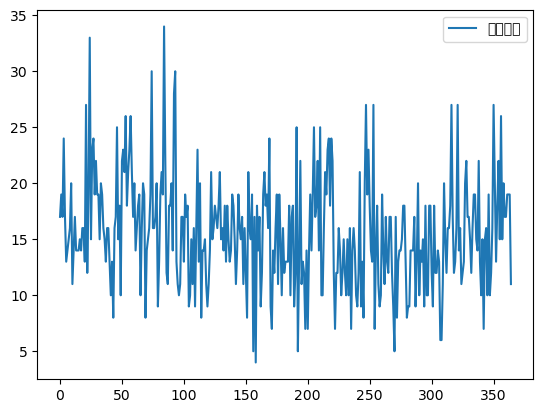

In [64]:
fire_date_df.plot.line()